## <center> Individual Project Week 12</center>

### <i> By: Jacob Oriang Jaroya</i>

For this week's individual project work, expectation is to try and improve the accuracy of the Stochastic Gradient Descent (SGD) Classifier by adding shifted images to the training set. 

This should help increase the amount of varied data we have for training the model and in turn improve the accuracy.  

1. Load Data 

Load the MNIST dataset from sklearn 

2. Data Preparation 

Split the dataset into 2 parts: training set for training the model and test set for evaluating the model's performance on unseen data. 

3. Expand Training Data 

Then we use the functions from the previous group work to increase the size of the training set by adding new digits with values that have been shifted to the <b>left, right, up or down by 1 pixel.</b> 

<b>Note:</b> This process should result in the training set being 5 times more than it was previously. 

4. Modelling 

- Then we Train the model on the training set and use cross validation to evaluate the model's training performance. 

- Plot a confusion matrix to visualise the model's prediction performance for <i>each of the digit classes</i> in the dataset 

- Test the accuracy of your model on unseen data and evaluate its performance by cross validating the model. 

In [1]:
import numpy as np
import pandas as pd 
from sklearn.datasets import fetch_openml 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mnist = pd.read_parquet('mnist_784.parquet')

In [3]:
# Split the dataframe into X(features) and y(labels)
X = mnist.drop('class', axis=1)
y = mnist['class']

In [4]:
# Split the data into X_train, X_test, y_train, y_test
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [5]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
60000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
y_test.head()

60000    7
60001    2
60002    1
60003    0
60004    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [15]:
first_image = mnist.iloc[0, :-1].astype('float').values

# Convert the pixel values to a numpy array and reshape it to 28x28
image = first_image.reshape(28, 28)


from scipy.ndimage.interpolation import shift

def shift_image_up(image, shift_pixels=1):
    """Shift an image up by the specified number of pixels"""
    shift_vector = [-shift_pixels, 0]  # shift up by the given number of pixels
    shifted_image = shift(image, shift_vector, cval=0)  # fill empty pixels with 0 (black)
    return shifted_image


# Define the shift_image_up function (from above)

# Shift the image up by 1 pixel using the shift_image_up function
image_shifted1 = shift_image_up(image, shift_pixels=1)


def shift_image_down(image, shift_pixels=1):
    """Shift an image down by the specified number of pixels"""
    shift_vector = [shift_pixels, 0]  # shift down by the given number of pixels
    shifted_image = shift(image, shift_vector, cval=0)  # fill empty pixels with 0 (black)
    return shifted_image

# Define the shift_image_down function

# Shift the image down by 1 pixel using the shift_image_down function
image_shifted2 = shift_image_down(image, shift_pixels=1)


def shift_image_right(image, shift_pixels=1):
    """Shift an image to the right by the specified number of pixels"""
    shift_vector = [0, shift_pixels]  # shift right by the given number of pixels
    shifted_image = shift(image, shift_vector, cval=0)  # fill empty pixels with 0 (black)
    return shifted_image

# Define the shift_image_right function

# Shift the image to the right by 1 pixel using the shift_image_right function
image_shifted3 = shift_image_right(image, shift_pixels=1)


def shift_image_left(image, shift_pixels=1):
    """Shift an image to the left by the specified number of pixels"""
    shift_vector = [0, -shift_pixels]  # shift left by the given number of pixels
    shifted_image = shift(image, shift_vector, cval=0)  # fill empty pixels with 0 (black)
    return shifted_image

# Define the shift_image_left function

# Shift the image to the left by 1 pixel using the shift_image_left function
image_shifted4 = shift_image_left(image, shift_pixels=1)               

C:\Users\Jaroya\AppData\Local\Temp\ipykernel_5372\3800726259.py:7: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [19]:
# Create empty lists to hold the shifted images and labels
shifted_images = []
shifted_labels = []

# Loop through the original images and labels
for i in range(len(X_train)):
    # Extract the image and label
    image = X_train.iloc[i,:].values.reshape(28,28)
    label = y_train[i]
    
    # Generate the shifted images
    image_shifted1 = shift_image_up(image, shift_pixels=1)
    image_shifted2 = shift_image_down(image, shift_pixels=1)
    image_shifted3 = shift_image_right(image, shift_pixels=1)
    image_shifted4 = shift_image_left(image, shift_pixels=1)
    
    # Append the original and shifted images to the list
    shifted_images.extend([image, image_shifted1, image_shifted2, image_shifted3, image_shifted4])
    
    # Append the corresponding label to the list for each image
    shifted_labels.extend([label]*5)
    
# Convert the lists to numpy arrays
X_train_shifted = np.array(shifted_images)
y_train_shifted = np.array(shifted_labels)

# Check the shape of the new arrays
print(X_train_shifted.shape)  # (300000, 784)
print(y_train_shifted.shape)  # (300000,)

(300000, 28, 28)
(300000,)


In [20]:
X_train_shifted = X_train_shifted.reshape(-1, 28*28)
print(X_train_shifted.shape)

(300000, 784)


In [23]:
X_train_shifted.shape, y_train_shifted.shape

((300000, 784), (300000,))

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

In [25]:
# Train the classifier on the shifted training data
sgd_clf.fit(X_train_shifted, y_train_shifted)

SGDClassifier(random_state=42)

#### Measuring Accuracy Using Cross-Validation
A good way to evaluate a model is to use cross-validation.

Let’s use the cross_val_score() function to evaluate the SGDClassifier model using K-fold cross-validation, with three folds.

<b>Note:</b>

K-fold cross validation means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds

In [26]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
y_train_pred = cross_val_score(sgd_clf, X_train_shifted, y_train_shifted, cv=3, scoring="accuracy")
y_train_pred

array([0.79044, 0.80951, 0.81182])

#### Accuracy: We get bove 79% accuracy (ratio of correct predictions) on all cross-validation folds with Training data.

Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. 
- This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_shifted, y_train_shifted, cv=3)

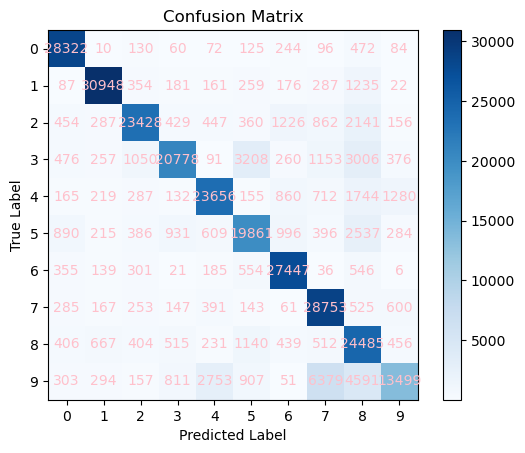

In [49]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix on the training data
conf_mx = confusion_matrix(y_train_shifted, y_train_pred)

# Plot the confusion matrix as an image
plt.imshow(conf_mx, cmap=plt.cm.Blues)

# Add axis labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add colorbar
plt.colorbar()

# Add tick marks for labels
tick_marks = np.arange(len(np.unique(y_train_shifted)))
plt.xticks(tick_marks, np.unique(y_train_shifted))
plt.yticks(tick_marks, np.unique(y_train_shifted))

# Add text annotations for each cell
for i in range(conf_mx.shape[0]):
    for j in range(conf_mx.shape[1]):
        plt.text(j, i, conf_mx[i, j], ha='center', va='center', color='pink')

# Show the plot
plt.show()


#### Precision and Recall

In [30]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_shifted, y_train_pred, average='micro')

0.8039233333333333

From the above output, the "micro" average, calculates Precision Score globally by counting the total true positives, false negatives, and false positives: Here we get 80.4% precision.

In [31]:
precision_score(y_train_shifted, y_train_pred, average='macro')

0.8132825790980762

Alternatively as shown above, the "macro" average, calculates the Precision Score for each label and takes the unweighted mean: Here we get 81.3% precision.

In [33]:
recall_score(y_train_shifted, y_train_pred,average='micro' )

0.8039233333333333

The above code calculates the recall by counting the total true positives, false negatives, and false positives across all classes. Here recall stands at 80.4%.

In [34]:
recall_score(y_train_shifted, y_train_pred,average='macro' )

0.8017493023048902

The above code calculates the recall for each class separately and takes the unweighted mean across all classes. Here we get a recall of 80.2%.

#### NOTE:
The choice of the average setting depends on the problem and what kind of metric aggregation wanted. The "micro" average can be useful if we want to give equal weight to each data point, while the "macro" average can be useful if we want to give equal weight to each class.

#### F1 Score

In [36]:
from sklearn.metrics import f1_score

f1_score(y_train_shifted, y_train_pred, average='micro')

0.8039233333333333

The above code calculates the F1 score by counting the total true positives, false negatives, and false positives across all classes. Here the F1 Score = 80.4%.

In [37]:
f1_score(y_train_shifted, y_train_pred, average='macro')

0.7978812654203068

Alternatively, to calculate the F1 score for each class we use the "macro" average. This will calculate the F1 score for each class separately and take the unweighted mean across all classes. Here the F1 Score = 79.8%.

#### NOTE:
Just as we saw with <b>precision_score and recall_score</b>, the choice of the average setting depends on the problem and what kind of metric aggregation you want. The "micro" average can be useful if you want to give equal weight to each data point, while the "macro" average can be useful if you want to give equal weight to each class.

### Testing the model

In [38]:
# Perform cross-validation on test data
y_test_pred = cross_val_score(sgd_clf, X_test, y_test, cv=3, scoring="accuracy")
y_test_pred

array([0.82783443, 0.85448545, 0.8919892 ])

#### Accuracy: We get bove 82% accuracy (ratio of correct predictions) on all cross-validation folds with Test data as compared with 79% from Training data.

In [39]:
y_test_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3)

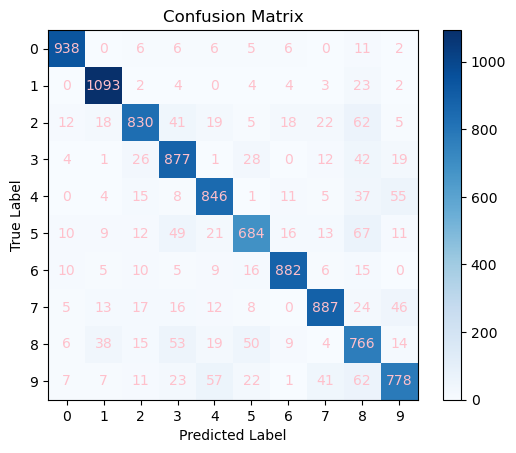

In [50]:
# Compute the confusion matrix on the test data
test_conf_mx = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as an image
plt.imshow(test_conf_mx, cmap=plt.cm.Blues)

# Add axis labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add colorbar
plt.colorbar()

# Add tick marks for labels
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

# Add text annotations for each cell
for i in range(test_conf_mx.shape[0]):
    for j in range(test_conf_mx.shape[1]):
        plt.text(j, i, test_conf_mx[i, j], ha='center', va='center', color='pink')

# Show the plot
plt.show()

#### Precision and Recall on Test data

In [42]:
precision_score(y_test, y_test_pred, average='micro')

0.8581

The above code calculates the recall by counting the total true positives, false negatives, and false positives across all classes. Here recall stands at 85.8% compared with 80.4% from the Training data.

In [43]:
recall_score(y_test, y_test_pred, average='macro')

0.8562058741120293

The above code calculates the recall for each class separately and takes the unweighted mean across all classes. Here we get a recall of 85.6% compared with 80.2% from the Training data.

#### F1 Score on Test data

In [44]:
f1_score(y_test, y_test_pred, average='micro')

0.8581

The above code calculates the F1 score by counting the total true positives, false negatives, and false positives across all classes. Here the F1 Score = 85.8% compared with 80.4% from the Training data.

In [45]:
f1_score(y_test, y_test_pred, average='macro')

0.8567429737281635

Alternatively, to calculate the F1 score for each class we use the "macro" average. This will calculate the F1 score for each class separately and take the unweighted mean across all classes. Here the F1 Score = 85.7% compared with 79.8% from the Training data.

### CONCLUSION:
#### We can conclude that the model is performing better on the Test Set as compared with its performance on Training set.